# Importing Libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Reading Data into dataframe

In [123]:
data = pd.read_csv('/Users/arfatshaikh/Documents/Machine-Learning/Logistic Regression/dataset/loantap.csv')

In [124]:
pd.set_option('display.max_columns', None)

In [125]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [126]:
data.shape

(396030, 27)

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [128]:
data.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [129]:
for i in data.columns:
    if data[i].dtype == 'object':
        print(i)
        print(data[i].unique())
        print("--------"*20)

term
[' 36 months' ' 60 months']
----------------------------------------------------------------------------------------------------------------------------------------------------------------
grade
['B' 'A' 'C' 'E' 'D' 'F' 'G']
----------------------------------------------------------------------------------------------------------------------------------------------------------------
sub_grade
['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']
----------------------------------------------------------------------------------------------------------------------------------------------------------------
emp_title
['Marketing' 'Credit analyst ' 'Statistician' ...
 "Michael's Arts & Crafts" 'licensed bankere' 'Gracon Services, Inc']
---------------------------------------------------------------------------------------------------------------------------------

# Data Cleansing

In [130]:
data['term'].replace({' 36 months': 36, ' 60 months': 60}, inplace=True)

Unique patterns in address field
[
    '0174 Michelle Gateway\r\nMendozaberg, OK 22690',
    'USCGC Roth\r\nFPO AA 70466',
    'Unit 8386 Box 5821\r\nDPO AE 05113',
    'USNV Trujillo\r\nFPO AA 30723',
    'PSC 5108, Box 2953\r\nAPO AP 05113',
    'USS Ramirez\r\nFPO AP 29597',
    'USNS Roberts\r\nFPO AA 11650'
]

In [131]:
def split_address(addr):
    match = re.match(r'(?P<house_no>\d+)\s+(?P<first_add>.*?)\r\n(?P<second_add>.*?),\s+(?P<state>[A-Z]+)\s+(?P<zipcode>\d+)', addr)
    if match:
        return pd.Series(match.groupdict())
    return pd.Series([None]*5, index=['house_no', 'first_add', 'second_add', 'state', 'zipcode'])

In [132]:
data['address'] = data['address'].astype(str)

In [133]:
print(data['address'].head())  # Check the first few rows
print(data['address'].dtype)  # Check the data type
print(data['address'].isnull().sum())  # Check for null values

0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object
object
0


In [134]:
address_split = data['address'].apply(split_address)

In [135]:
data = pd.concat([data, address_split], axis=1)

In [136]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,house_no,first_add,second_add,state,zipcode
0,10000.0,36,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0174,Michelle Gateway,Mendozaberg,OK,22690
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1076,Carney Fort Apt. 347,Loganmouth,SD,05113
2,15600.0,36,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",87025,Mark Dale Apt. 269,New Sabrina,WV,05113
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",823,Reid Ford,Delacruzside,MA,00813
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",679,Luna Roads,Greggshire,VA,11650


In [137]:
data.loc[data['emp_title'].isna(), ['emp_title']] = 'Unknown'

In [138]:
data.loc[data['title'].isna(), ['title']] = 'Unknown'

In [139]:
data.loc[data['emp_length'].isna(), ['emp_length']] = 'Unknown'

USCGC Nunez\r\nFPO AE 30723,
Unit 8386 Box 5821\r\nDPO AE 05113,
USNV Trujillo\r\nFPO AA 30723,
PSC 5108, Box 2953\r\nAPO AP 05113,
USS Goodman\r\nFPO AE 22690,
USNS Roberts\r\nFPO AA 11650

In [140]:
def pattern2(addr):
    pattern = (
    r'(?P<house_no>[A-Za-z0-9,]+(?:\s+[A-Za-z0-9,]+)*)'  # house_no: allows letters, numbers, spaces, and commas
    r'\s+(?P<first_add>Box\s+\d+)'                       # first_add: Box number (e.g., Box 2953)
    r'\r\n(?P<second_add>[A-Za-z]{3})'                   # second_add: military type (e.g., APO)
    r'\s+(?P<state>[A-Z]{2})'                            # state code (e.g., AP)
    r'\s+(?P<zipcode>\d{5})'                             # 5-digit zip code
)

    # Apply regex to extract the parts
    match = re.match(pattern, addr)
    if match:
        result = match.groupdict()
        result['first_add'] = result['first_add'] if result['first_add'] else ''
        return pd.Series(result)
    return pd.Series([None]*5, index=['house_no', 'first_add','second_add', 'state', 'zipcode'])

In [141]:
def pattern3(addr):
    pattern = (
    r'(?P<house_no>[A-Za-z0-9]+)'                    # house_no: first word only (e.g., USNV)
    r'\s+(?P<first_add>[^\r\n]+)'                    # first_add: until newline (e.g., Trujillo)
    r'\r\n(?P<second_add>[A-Za-z]{3})'               # second_add: FPO/DPO/APO
    r'\s+(?P<state>[A-Z]{2})\s+(?P<zipcode>\d{5})'   # state and 5-digit zip
)

    # Apply regex to extract the parts
    match = re.match(pattern, addr)
    if match:
        result = match.groupdict()
        result['first_add'] = result['first_add'] if result['first_add'] else ''
        return pd.Series(result)
    return pd.Series([None]*5, index=['house_no', 'first_add','second_add', 'state', 'zipcode'])

In [142]:
data.loc[data['address'].str.split(' ').str[0].isin(['Unit','PSC']),'address'].apply(pattern2)

,house_no,first_add,second_add,state,zipcode
19,Unit 8386,Box 5821,DPO,AE,05113
26,Unit 3166,Box 1862,DPO,AE,48052
39,"PSC 5108,",Box 2953,APO,AP,05113
45,"PSC 7168,",Box 4065,APO,AA,22690
111,Unit 4847,Box 9014,DPO,AE,29597
...,...,...,...,...,...
395995,"PSC 0897,",Box 0320,APO,AP,22690
395997,"PSC 0473,",Box 7813,APO,AP,22690
396010,"PSC 9340,",Box 6659,APO,AA,05113
396012,Unit 3583,Box 8426,DPO,AP,29597


In [143]:
# Apply the pattern function to rows where 'house_no' is None and 'address' starts with 'USCGC'
uscgc_rows = data.loc[data['address'].str.split(' ').str[0].isin(['Unit','PSC'])]
updated_values = uscgc_rows['address'].apply(pattern2)

# Update the columns with the extracted values where they are None
for col in ['house_no', 'first_add', 'second_add', 'state', 'zipcode']:
    data.loc[data['address'].str.split(' ').str[0].isin(['Unit','PSC']), col] = data.loc[data['address'].str.split(' ').str[0].isin(['Unit','PSC']), col].fillna(updated_values[col])

In [144]:
data.loc[data['address'].str.split(' ').str[0].isin(['USNV','USS','USCGC','USNS']),'address'].apply(pattern3)

,house_no,first_add,second_add,state,zipcode
7,USCGC,Nunez,FPO,AE,30723
8,USCGC,Tran,FPO,AP,22690
33,USNV,Trujillo,FPO,AA,30723
62,USS,Goodman,FPO,AE,22690
92,USCGC,Hamilton,FPO,AA,48052
...,...,...,...,...,...
395900,USNS,Taylor,FPO,AE,29597
395903,USNV,Mills,FPO,AE,70466
395917,USS,Wright,FPO,AP,48052
395925,USNS,Rodriguez,FPO,AA,05113


In [145]:
# Apply the pattern function to rows where 'house_no' is None and 'address' starts with 'USCGC'
uscgc_rows = data.loc[data['address'].str.split(' ').str[0].isin(['USNV','USS','USCGC','USNS'])]
updated_values = uscgc_rows['address'].apply(pattern3)

# Update the columns with the extracted values where they are None
for col in ['house_no', 'first_add', 'second_add', 'state', 'zipcode']:
    data.loc[data['address'].str.split(' ').str[0].isin(['USNV','USS','USCGC','USNS']), col] = data.loc[data['address'].str.split(' ').str[0].isin(['USNV','USS','USCGC','USNS']), col].fillna(updated_values[col])

In [146]:
data.loc[data['revol_util'].isna(), ['revol_util']] = 0

In [147]:
data.loc[data['mort_acc'].isna(), ['mort_acc']] = 0

In [148]:
data.loc[data['pub_rec_bankruptcies'].isna(), ['pub_rec_bankruptcies']] = 0

In [149]:
data.isna().sum()  

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
house_no                0
first_add               0
second_add              0
state                   0
zipcode                 0
dtype: int64

In [150]:
data.drop('address', axis=1, inplace=True)

In [151]:
data['pub_rec'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  6.,  5.,  8.,  9., 10., 11.,  7., 19.,
       13., 40., 17., 86., 12., 24., 15.])

# Feature Engineering

In [152]:
data['loan_income_ratio'] = data['loan_amnt'] / data['annual_inc']
data['installment_income_ratio'] = (data['installment'] / (data['annual_inc'] / 12))
data['open_acc_ratio'] = data['open_acc'] / (data['total_acc'])
data['revol_balance_per_open_acc'] = data['revol_bal'] / (data['open_acc'])


In [153]:
data['revol_balance_per_open_acc'] = data['revol_balance_per_open_acc'].fillna(0)

In [154]:
data.loc[data['annual_inc'] == 0,'loan_income_ratio'] = 0
data.loc[data['annual_inc'] == 0,'installment_income_ratio'] = 0

In [155]:
# Convert 'issue_d' and 'earliest_cr_line' to datetime format
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%Y')
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%Y')

# Calculate the credit age in months
data['credit_age_months'] = (data['issue_d'] - data['earliest_cr_line']).dt.days // 30

In [156]:
data['issue_year'] = data['issue_d'].dt.year
data['issue_month'] = data['issue_d'].dt.month
data['issue_quarter'] = data['issue_d'].dt.quarter

In [157]:
data['issue_year'] = data['issue_d'].dt.year
data['issue_month'] = data['issue_d'].dt.month
data['issue_quarter'] = data['issue_d'].dt.quarter

In [158]:
data['earliest_cr_line_year'] = data['earliest_cr_line'].dt.year
data['earliest_cr_line_month'] = data['earliest_cr_line'].dt.month
data['earliest_cr_line_quarter'] = data['earliest_cr_line'].dt.quarter

In [159]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,house_no,first_add,second_add,state,zipcode,loan_income_ratio,installment_income_ratio,open_acc_ratio,revol_balance_per_open_acc,credit_age_months,issue_year,issue_month,issue_quarter,earliest_cr_line_year,earliest_cr_line_month,earliest_cr_line_quarter
0,10000.0,36,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,2015-01-01,Fully Paid,vacation,Vacation,26.24,1990-06-01,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,0174,Michelle Gateway,Mendozaberg,OK,22690,0.085470,0.033793,0.640000,2273.062500,299,2015,1,1,1990,6,2
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,2015-01-01,Fully Paid,debt_consolidation,Debt consolidation,22.05,2004-07-01,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,1076,Carney Fort Apt. 347,Loganmouth,SD,05113,0.123077,0.049049,0.629630,1184.176471,127,2015,1,1,2004,7,3
2,15600.0,36,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,2015-01-01,Fully Paid,credit_card,Credit card refinancing,12.79,2007-08-01,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,87025,Mark Dale Apt. 269,New Sabrina,WV,05113,0.362310,0.141293,0.500000,922.076923,90,2015,1,1,2007,8,3
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,2014-11-01,Fully Paid,credit_card,Credit card refinancing,2.60,2006-09-01,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,823,Reid Ford,Delacruzside,MA,00813,0.133333,0.049033,0.461538,912.000000,99,2014,11,4,2006,9,3
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,2013-04-01,Charged Off,credit_card,Credit Card Refinance,33.95,1999-03-01,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,679,Luna Roads,Greggshire,VA,11650,0.443182,0.132945,0.302326,1891.076923,171,2013,4,2,1999,3,1


In [160]:
data.drop(['issue_d', 'earliest_cr_line'], axis=1, inplace=True)

In [161]:
for i in data.columns:
    if data[i].dtype == 'object':
        print(i)

grade
sub_grade
emp_title
emp_length
home_ownership
verification_status
loan_status
purpose
title
initial_list_status
application_type
house_no
first_add
second_add
state
zipcode


In [162]:
le = LabelEncoder()
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = le.fit_transform(data[i])
        print(i,'Label Encoding Completed')

grade Label Encoding Completed
sub_grade Label Encoding Completed
emp_title Label Encoding Completed
emp_length Label Encoding Completed
home_ownership Label Encoding Completed
verification_status Label Encoding Completed
loan_status Label Encoding Completed
purpose Label Encoding Completed
title Label Encoding Completed
initial_list_status Label Encoding Completed
application_type Label Encoding Completed
house_no Label Encoding Completed
first_add Label Encoding Completed
second_add Label Encoding Completed
state Label Encoding Completed
zipcode Label Encoding Completed


In [163]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,house_no,first_add,second_add,state,zipcode,loan_income_ratio,installment_income_ratio,open_acc_ratio,revol_balance_per_open_acc,credit_age_months,issue_year,issue_month,issue_quarter,earliest_cr_line_year,earliest_cr_line_month,earliest_cr_line_quarter
0,10000.0,36,11.44,329.48,1,8,80956,1,5,117000.0,0,1,12,36961,26.24,16.0,0.0,36369.0,41.8,25.0,1,1,0.0,0.0,1399,187468,28497,39,3,0.085470,0.033793,0.640000,2273.062500,299,2015,1,1,1990,6,2
1,8000.0,36,11.99,265.68,1,9,33317,4,1,65000.0,0,1,2,12926,22.05,17.0,0.0,20131.0,53.3,27.0,0,1,3.0,0.0,8681,48572,26534,44,1,0.123077,0.049049,0.629630,1184.176471,127,2015,1,1,2004,7,3
2,15600.0,36,10.49,506.97,1,7,127182,10,5,43057.0,1,1,1,10159,12.79,13.0,0.0,11987.0,92.2,26.0,0,1,0.0,0.0,69951,172076,34547,52,1,0.362310,0.141293,0.500000,922.076923,90,2015,1,1,2007,8,3
3,7200.0,36,6.49,220.65,0,1,27760,6,5,54000.0,0,1,1,10159,2.60,6.0,0.0,5472.0,21.5,13.0,0,1,0.0,0.0,66157,219302,6241,22,0,0.133333,0.049033,0.461538,912.000000,99,2014,11,4,2006,9,3
4,24375.0,60,17.27,609.33,2,14,38300,9,1,55000.0,2,0,1,9268,33.95,13.0,0.0,24584.0,69.8,43.0,0,1,1.0,0.0,54593,168235,15301,48,2,0.443182,0.132945,0.302326,1891.076923,171,2013,4,2,1999,3,1


<Axes: xlabel='loan_status', ylabel='count'>

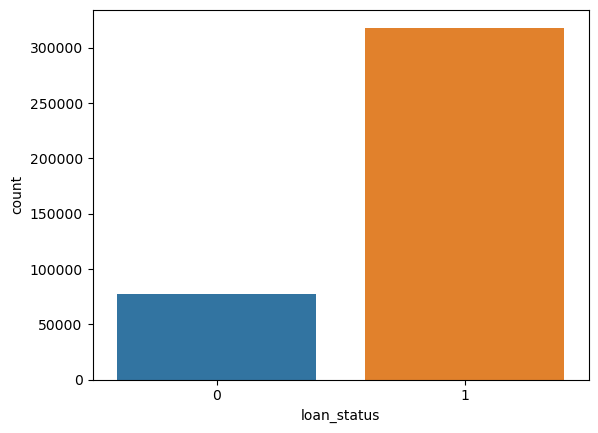

In [164]:
sns.countplot(x='loan_status', data=data)

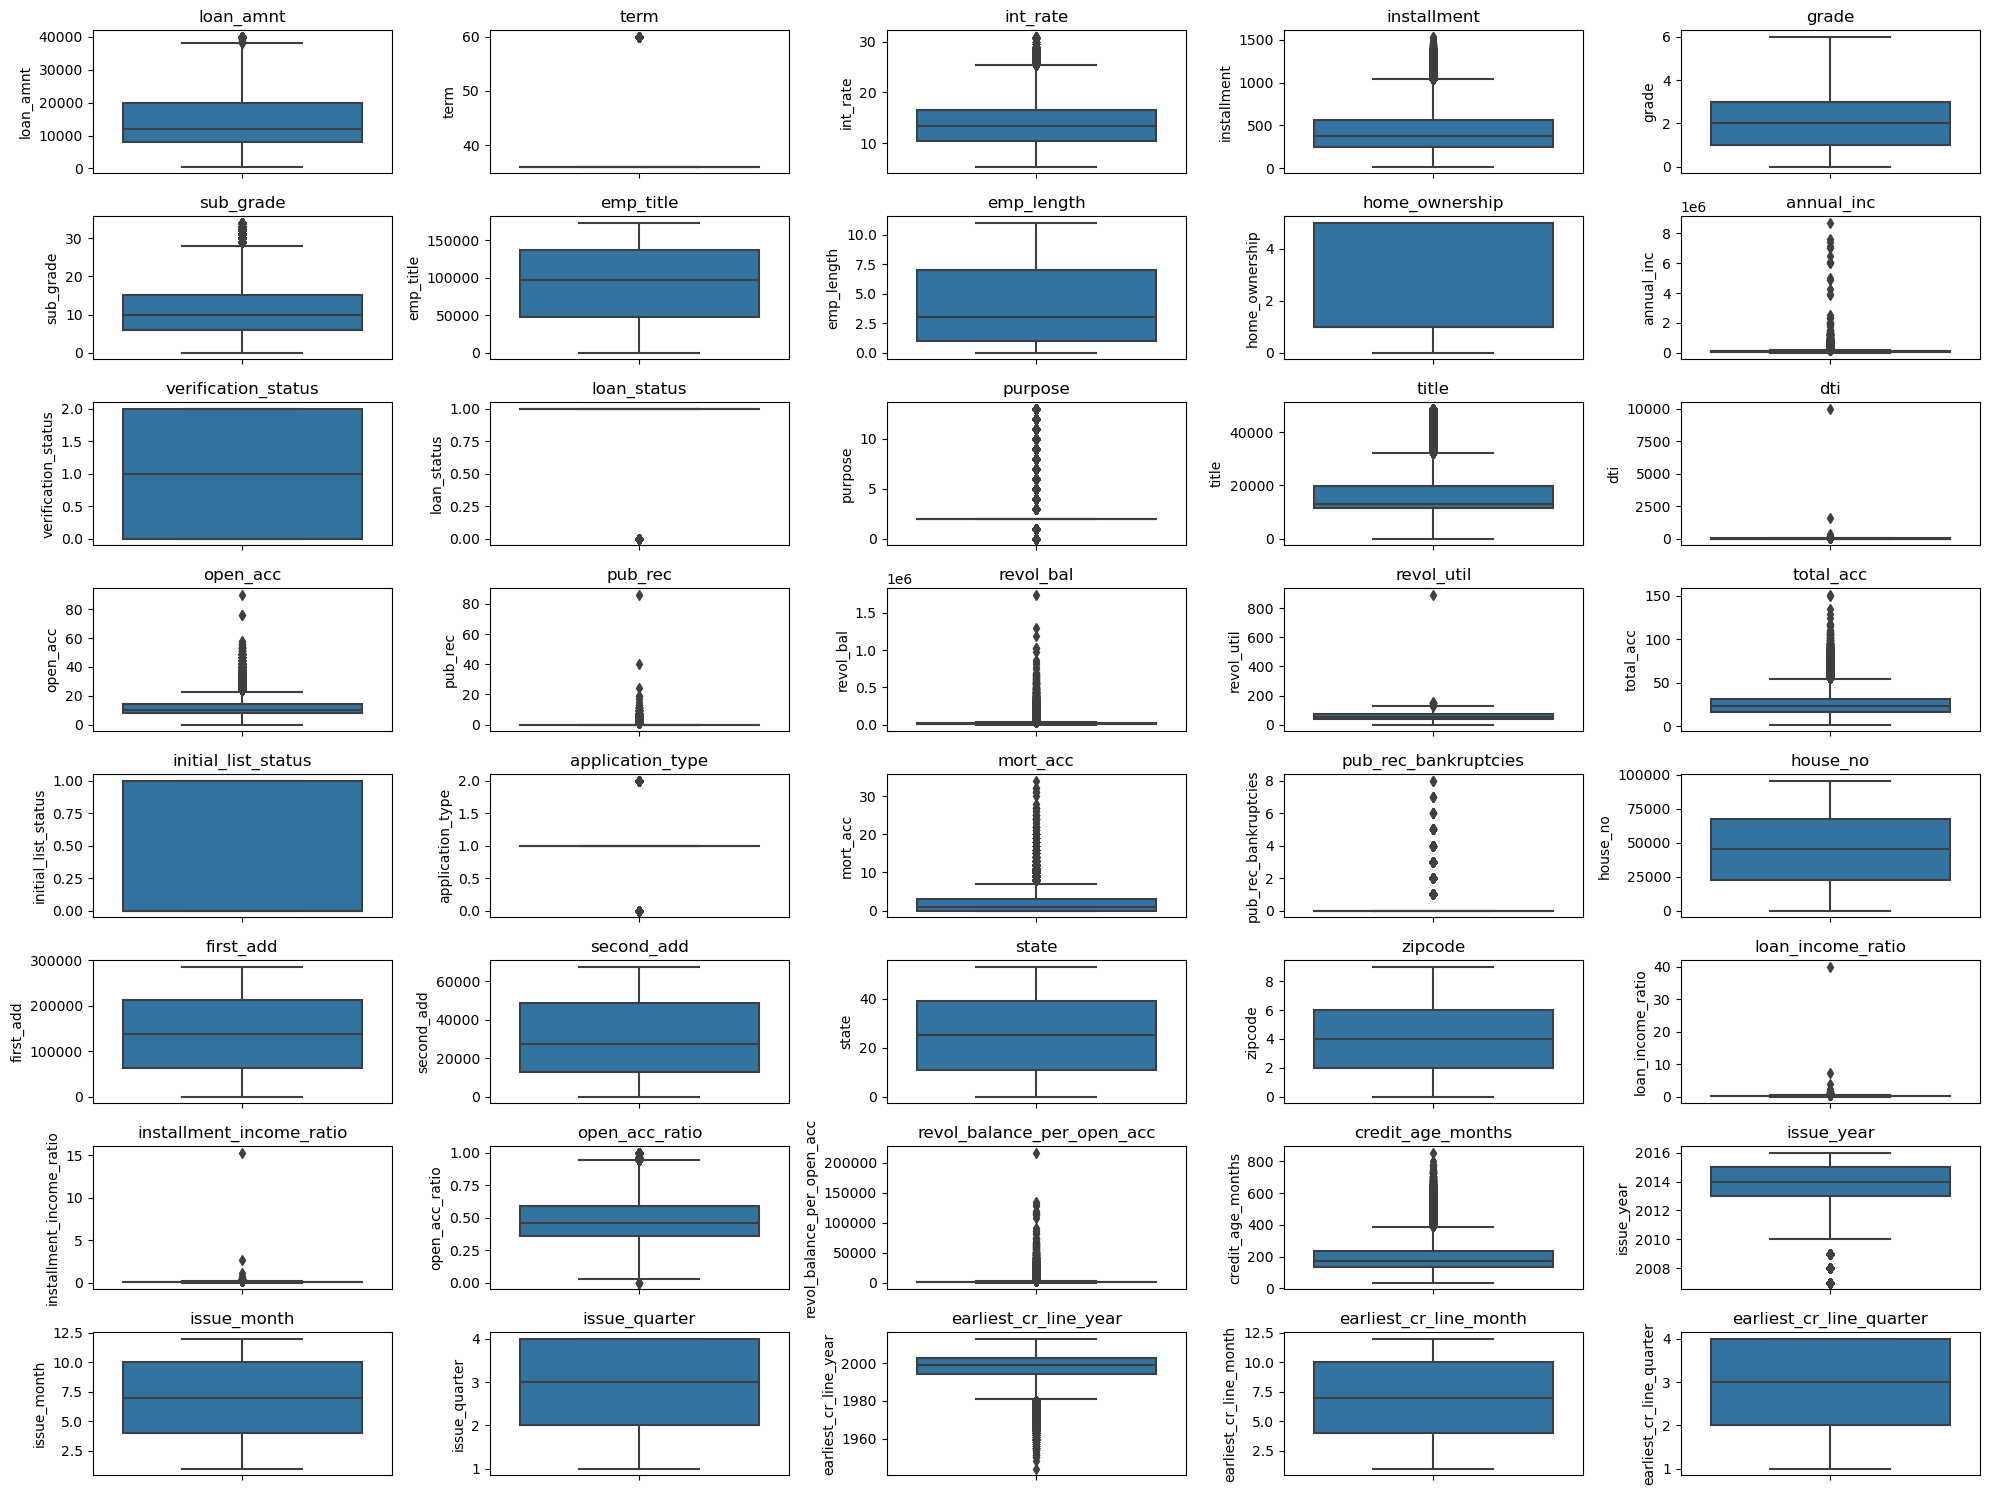

In [174]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 4) // 5, 5, i)
    sns.boxplot(y=data[col])
    plt.title(col)
    plt.tight_layout()

In [ ]:
X = data.drop(columns=['loan_status'])
Y = data['loan_status']

In [166]:
Scaler = StandardScaler()

In [ ]:
X_scaled = Scaler.fit_transform(X)

In [169]:
sm = SMOTE(random_state=42)

In [173]:
X_res, Y_res = sm.fit_resample(X_scaled, Y)
print(X_res.shape)
print(Y_res.shape)
print(Y_res.value_counts())
print(Y_res.value_counts(normalize=True))

(636714, 39)
(636714,)
1    318357
0    318357
Name: loan_status, dtype: int64
1    0.5
0    0.5
Name: loan_status, dtype: float64
